<a href="https://colab.research.google.com/github/hyun-been/Derivatives/blob/main/call_put_option_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
!git clone https://github.com/hyun-been/Derivatives.git

Cloning into 'Derivatives'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [223]:
import math
from matplotlib import pyplot as plt

In [224]:
def getPayoff(S, strike):
  payoff = 0 # when option is not excercised. payoff remains as 0
  if S > strike: # when option is excercised
    payoff = S - strike
  return payoff # get return

In [225]:
class Option: # create object called Option
  
  def __init__(self, asset, volatility, interest, strike, expiry): # set parameters
    self.asset = asset
    self.volatility = volatility
    self.interest = interest
    self.strike = strike
    self.expiry = expiry # count per year
    
    # set variable
    self.stepNum = int(365 * expiry) # to make time step = 1 day
    self.timeStep = 1/365 # timeStep * stepNum = expiry
    self.S = [] # final value of underlying asset
    for n in range (0, self.stepNum): # initialize list S as 0
      self.S.append(0)
    self.V = [] # option value
    for n in range (0, self.stepNum): # initialize list V as 0
      self.V.append(0)
  
  def optionPrice(self):
    discountFactor = math.exp(- self.interest * self.timeStep) # set discount factor as local variable

    temp1 = math.exp((self.interest + self.volatility ** 2) * self.timeStep)
    temp2 = 0.5 * (discountFactor + temp1)

    u = temp2 + math.sqrt(temp2 ** 2 - 1) # upper
    d = 1 / u # down
    p = (math.exp(self.interest * self.timeStep) - d) / (u - d) # probability

    self.S[0] = self.asset # set S[0] as asset to calculate

    for n in range (1, self.stepNum): # get S at expiry by using u, d
      for j in range (1, self.stepNum - n + 1): # u * S
        self.S[j] = u * self.S[j - 1]
      self.S[0] *= d

    for j in range (0, self.stepNum): # get option value V by checking strike price
      self.V[j] = getPayoff(self.S[j], self.strike)

    for n in range (1, self.stepNum): # recalculate option value by present value using discount factor
      for j in range (0, self.stepNum - n):
        self.V[j] = (p * self.V[j + 1] + (1 - p) * self.V[j]) * discountFactor

#    print("Call/put option price for underlying asset value of " + str(self.asset) + ", volatility "  + str(self.volatility) +
#          ",interest " + str(self.interest) + ", strike price " + str(self.strike) + ", expiry(year) " + str(self.expiry) +
#          " is " + str(self.V[0]))

    return self.V[0]

In [226]:
def optionExpiry(n): # option price calculated by expiry
  time = 0.1

  o = []
  x = []
  y = []

  for i in range(0, n + 1): # initialize list o, x, y
    o.append(0)
    x.append(0)
    y.append(0)

  for i in range(1, n + 1):
    o[i] = Option(100, 0.5, 0.1, 110, time * i) # make option model of different expiry
    x[i] = time * i
    y[i] = o[i].optionPrice()

  o = o[1:]
  x = x[1:]
  y = y[1:]

  plt.plot(x, y, marker = 'o')
  plt.xlabel('Expiry(year)')
  plt.ylabel('Option Price')
  plt.title('Option Price Through Different Expiry')
  

  for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i], 3), fontsize = 9, color='black', horizontalalignment='center', verticalalignment='bottom')

  plt.show()

In [227]:
def optionVolatility(n): # option price calculated by volatility
  v = 0.1

  o = []
  x = []
  y = []

  for i in range(0, n + 1): # initialize list o, x, y
    o.append(0)
    x.append(0)
    y.append(0)

  for i in range(1, n + 1):
    o[i] = Option(100, 0.5, v * i, 110, 0.1) # make option model of different volatility
    x[i] = v * i
    y[i] = o[i].optionPrice()

  o = o[1:]
  x = x[1:]
  y = y[1:]

  plt.plot(x, y, color = 'orange', marker = 'o')
  plt.xlabel('Volatility')
  plt.ylabel('Option Price')
  plt.title('Option Price Through Different Volatility')
  

  for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i], 3), fontsize = 9, color='black', horizontalalignment='center', verticalalignment='bottom')

  plt.show()

In [228]:
def optionInterest(n):
  r = 0.05

  o = []
  x = []
  y = []

  for i in range(0, n + 1): # initialize list o, x, y
    o.append(0)
    x.append(0)
    y.append(0)

  for i in range(1, n + 1):
    o[i] = Option(100, 0.5, r * i, 110, 0.1) # make option model of different volatility
    x[i] = r * i
    y[i] = o[i].optionPrice()

  o = o[1:]
  x = x[1:]
  y = y[1:]

  plt.plot(x, y, color = 'green', marker = 'o')
  plt.xlabel('Interest(year)')
  plt.ylabel('Option Price')
  plt.title('Option Price Through Different Interest')
  

  for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i], 3), fontsize = 9, color='black', horizontalalignment='center', verticalalignment='bottom')

  plt.show()

In [229]:
def main():

  optionExpiry(10) # get option price with different expiry
  optionVolatility(10) # get option price with different volatility
  optionInterest(10) # get option price with different interest

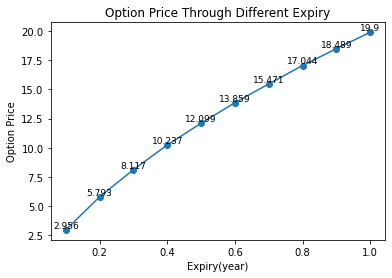

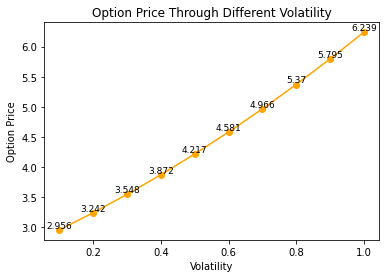

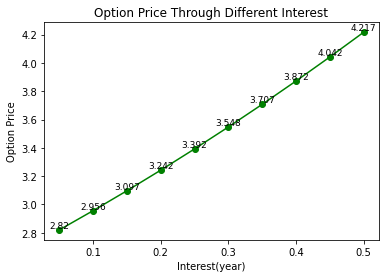

In [230]:
if __name__ == "__main__":
  main()